In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [83]:
# 최대 x 범위 : 0 <= x < x_max
x_max = 1
x = tf.Variable(np.array([[i/100] for i in range(0, x_max * 100, 1)], dtype = np.float32))

# 차수, weight 개수
n = 4

# w = [weight1, weight2, weight3, weight4]
w = tf.Variable(tf.random.normal(shape=(n,), dtype=tf.float32))

# analysis 함수 
def anal(x, lamb = 1):
    return np.exp(lamb*x)

def f(anal, lamb = 1):
    return lamb*anal

# n : w 개수, w : weight
def y(x, w, n = 4):
    y = 1
    
    # y = 1 + w1*(x) + w2*(x**2) + w3*(x**3) + w4*(x**4)
    for i in range(1, n+1):
        y += w[i-1]*(x**i)
    
    return y

def yprime(x, w, n = 4):
    yprime = 0

    # yprime = w1 + 2*w2*x + 3*w3*(x**2) + 4*w4*(x**3)
    for i in range(1, n + 1):
      yprime += i*w[i-1]*(x**(i-1))

    return yprime

# lambda 값, 학습률 조정
lamb = 1
learning_rate = 0.01
EPOCH = 10

# 변화 w 값, loss 저장
w_trace = []
w_trace.append(w.numpy())
loss_trace = []

# 학습 과정
for epoch in range(EPOCH):
    for x_unit, y_unit in zip(x, f(anal(x), lamb)):
        with tf.GradientTape() as tape:
            # 예측 값
            predict = y(x_unit, w, n)
            # 오차
            # loss = tf.reduce_mean(tf.square(yprime(x, w) - f(anal(x), lamb)))
            loss = tf.reduce_mean(tf.square(predict - yprime(x_unit, w, n)))
            loss_trace.append(loss.numpy())
            gradients = tape.gradient(loss, w)

            w = tf.Variable(w - learning_rate*gradients)
            w_trace.append(w.numpy())


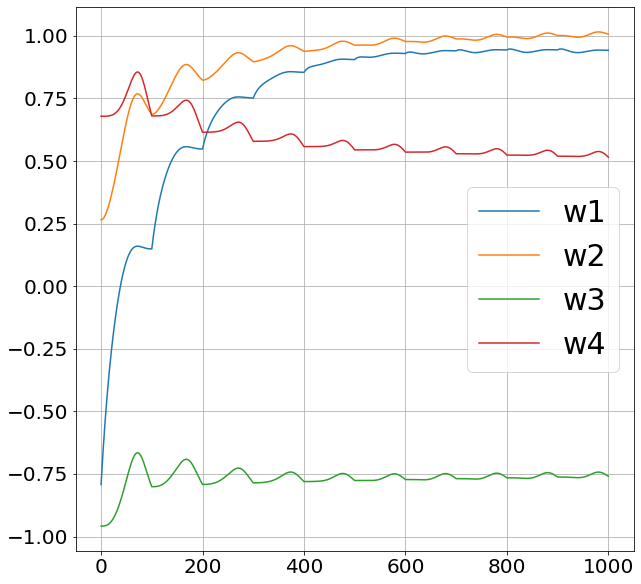

In [84]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(w_trace, label = ['w1', 'w2', 'w3', 'w4'])
ax.tick_params(labelsize=20)
ax.legend(fontsize=30)
ax.grid()

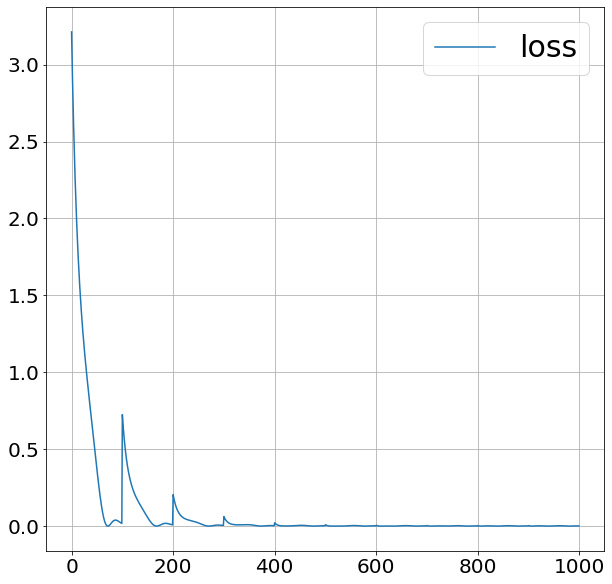

In [85]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(loss_trace, label = 'loss')
ax.tick_params(labelsize=20)
ax.legend(fontsize=30)
ax.grid()

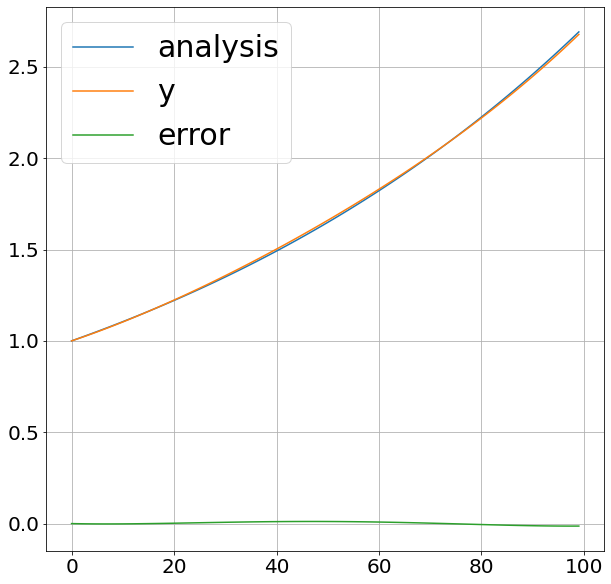

In [90]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(anal(x), label = 'analysis')
ax.plot(y(x, w, n), label = 'y')
ax.plot(y(x, w, n) - anal(x), label = 'error')
ax.tick_params(labelsize=20)
ax.legend(fontsize=30)
ax.grid()

In [87]:
np.exp(1)

2.718281828459045

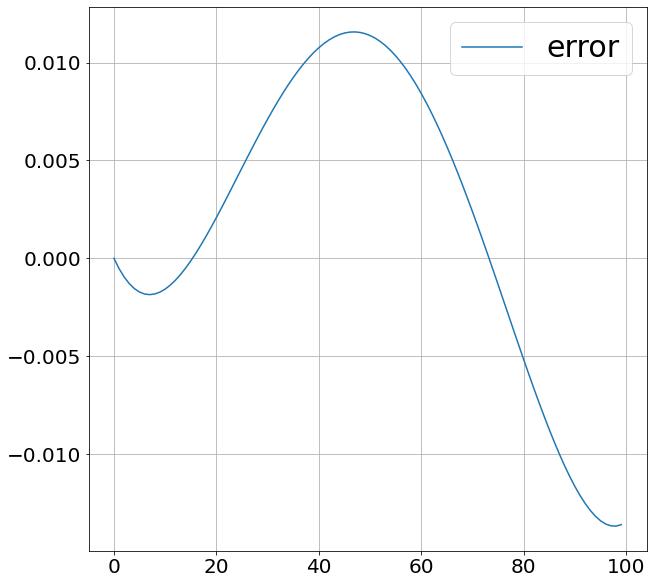

In [91]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(y(x, w, n) - anal(x), label = 'error')
ax.tick_params(labelsize=20)
ax.legend(fontsize=30)
ax.grid()